In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

A **credit score** is a numerical rating that represents an individual's creditworthiness, or how likely they are to repay borrowed money. Lenders, such as banks, credit card companies, and other financial institutions, use this score to evaluate the risk of lending money to a borrower.

### Key Points About Credit Score

1. **Range**:
   - Credit scores typically range from **300 to 850**. A higher score indicates lower credit risk, meaning the individual is more likely to repay loans and make timely payments.

2. **Factors Affecting Credit Score**:
   - **Payment History**: Timely payments on loans, credit cards, and bills positively impact your score.
   - **Credit Utilization Ratio**: This is the ratio of credit used compared to total credit available. Using too much of your available credit can lower your score.
   - **Length of Credit History**: The longer your credit history, the better, as it shows lenders your track record with managing credit.
   - **Types of Credit**: A mix of different types of credit (e.g., loans, credit cards) can boost your score.
   - **New Credit Inquiries**: Frequent applications for new credit or loans can lower your score temporarily, as it signals you may be taking on more debt.

3. **Credit Score Categories**:
   - **Excellent** (750-850): Very low risk to lenders; often qualifies for the best interest rates.
   - **Good** (700-749): Low risk; generally qualifies for favorable interest rates.
   - **Fair** (650-699): Moderate risk; may get approved for loans but at higher interest rates.
   - **Poor** (below 650): High risk; may struggle to get approved or face very high-interest rates.

4. **Why Credit Scores Matter**:
   - Credit scores impact **loan approvals**, **interest rates**, **credit card eligibility**, and sometimes **rental applications** or **job applications** (especially in finance roles).
   - A higher credit score can save individuals money by providing access to lower interest rates on loans and credit cards.

5. **Credit Bureaus**:
   - In the U.S., the three major credit bureaus – **Equifax**, **Experian**, and **TransUnion** – calculate credit scores based on financial data reported to them by lenders.
   - In India, **CIBIL** (Credit Information Bureau India Limited) is the main bureau, along with others like Experian India and Equifax India.

By maintaining a good credit score, individuals can access better financial opportunities and benefit from lower borrowing costs over time.

In [ ]:
churn=pd.read_excel('Churn_Modelling.xlsx')

In [ ]:
churn.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
churn.shape

(10000, 14)

In [ ]:
churn.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
churn.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


if there are too many coreleted variables then we might go through dimensionality reduction.

In [ ]:
churn = churn.drop(["RowNumber", "CustomerId", "Surname"], axis = 1) #axis =1 : Remove the columns
churn.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
churn.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


- integer : to all the integer we might do correlation analysis.
- object : to all the object we might do one hot encoding.

### I want to know the pattern of churn .
1. for that firstly we look at the percentage of people who churned.

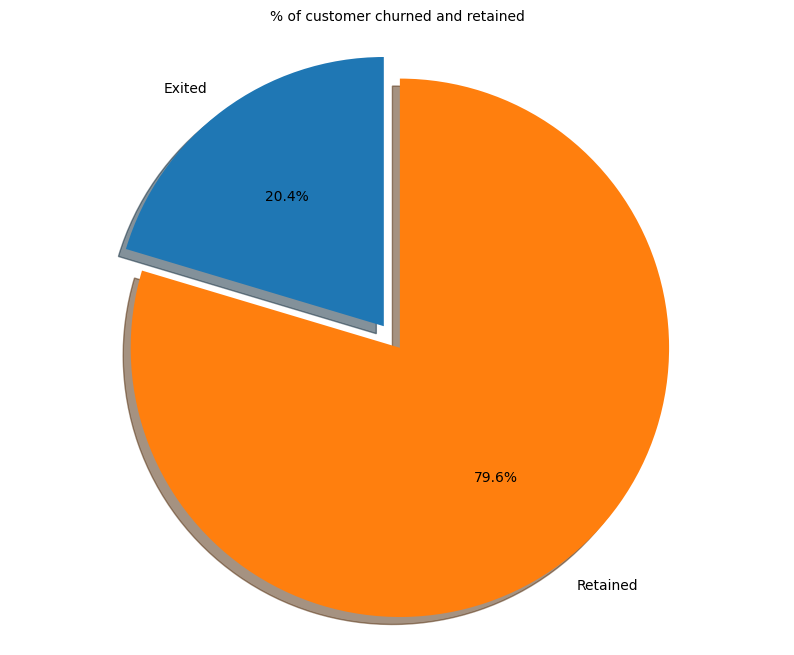

In [ ]:
labels = 'Exited', 'Retained'
sizes = [churn.Exited[churn['Exited']==1].count(), churn.Exited[churn['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("% of customer churned and retained", size = 10)
plt.show()

2. variable by variable churners v/s non churners behaviours.

<Axes: xlabel='IsActiveMember', ylabel='count'>

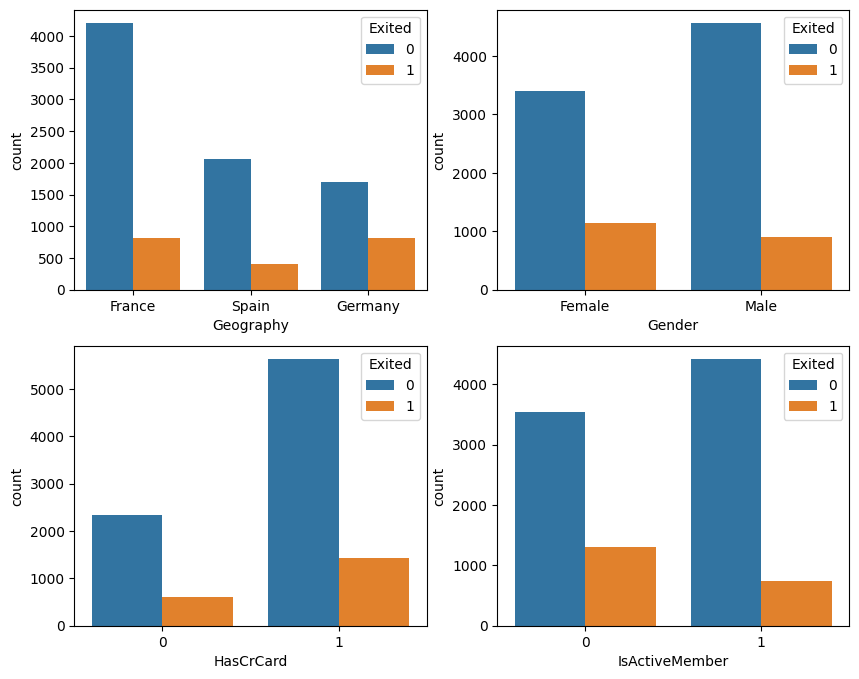

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(10, 8))
sns.countplot(x='Geography', hue = 'Exited',data = churn, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = churn, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = churn, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = churn, ax=axarr[1][1])

let say out of total 10,000 people how many percentage of people of france is churning , and it is difficult to understand the % of people from this bar plot so we try to make pie chart for that .

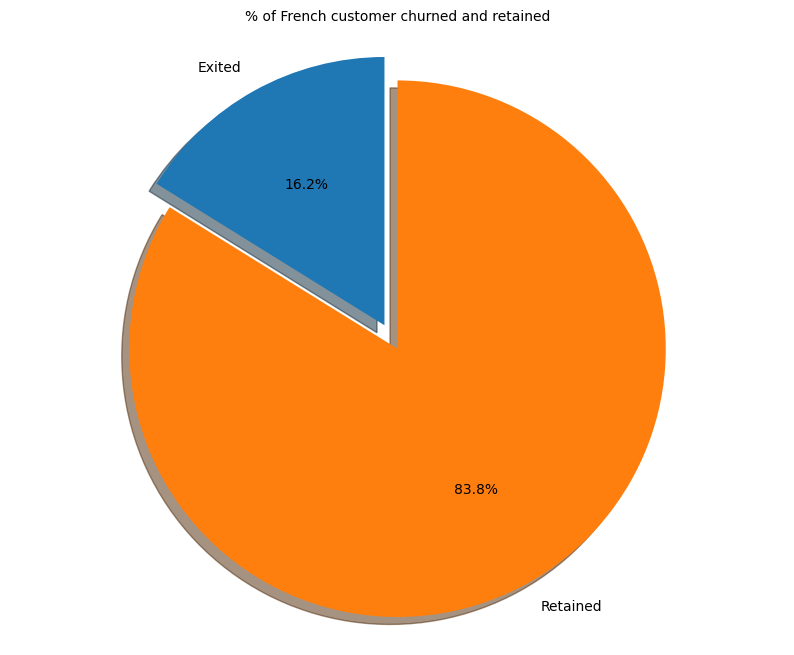

In [ ]:

import matplotlib.pyplot as plt
# Filter for customers from France
france_churn = churn[churn['Geography'] == 'France']

# Calculate churned and retained counts for France
france_churned = france_churn.Exited[france_churn['Exited'] == 1].count()
france_retained = france_churn.Exited[france_churn['Exited'] == 0].count()

# Create the pie chart
labels = 'Exited', 'Retained'
sizes = [france_churned, france_retained]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("% of French customer churned and retained", size=10)
plt.show()

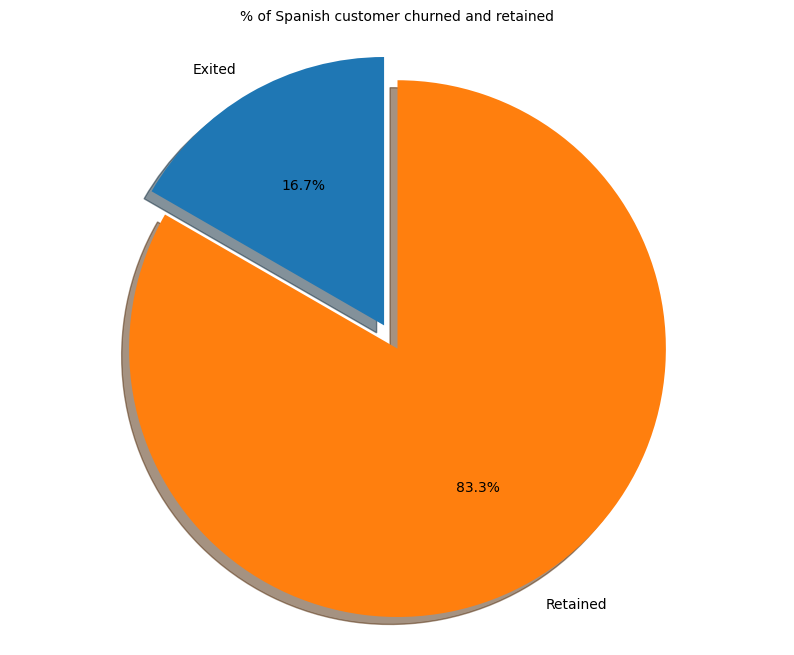

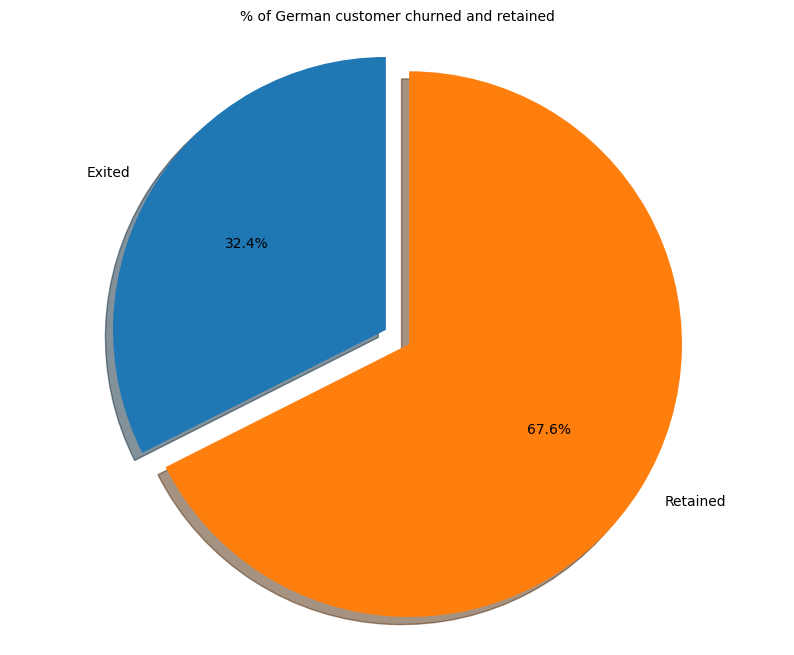

In [ ]:
# prompt: make the above code for three individual country (['France', 'Spain', 'Germany'

# Filter for customers from Spain
spain_churn = churn[churn['Geography'] == 'Spain']

# Calculate churned and retained counts for Spain
spain_churned = spain_churn.Exited[spain_churn['Exited'] == 1].count()
spain_retained = spain_churn.Exited[spain_churn['Exited'] == 0].count()

# Create the pie chart
labels = 'Exited', 'Retained'
sizes = [spain_churned, spain_retained]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("% of Spanish customer churned and retained", size=10)
plt.show()


# Filter for customers from Germany
germany_churn = churn[churn['Geography'] == 'Germany']

# Calculate churned and retained counts for Germany
germany_churned = germany_churn.Exited[germany_churn['Exited'] == 1].count()
germany_retained = germany_churn.Exited[germany_churn['Exited'] == 0].count()

# Create the pie chart
labels = 'Exited', 'Retained'
sizes = [germany_churned, germany_retained]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("% of German customer churned and retained", size=10)
plt.show()

These pie charts is for all the categorical variables .

**Now for Continuous Variable we will make `box` `plots`**

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

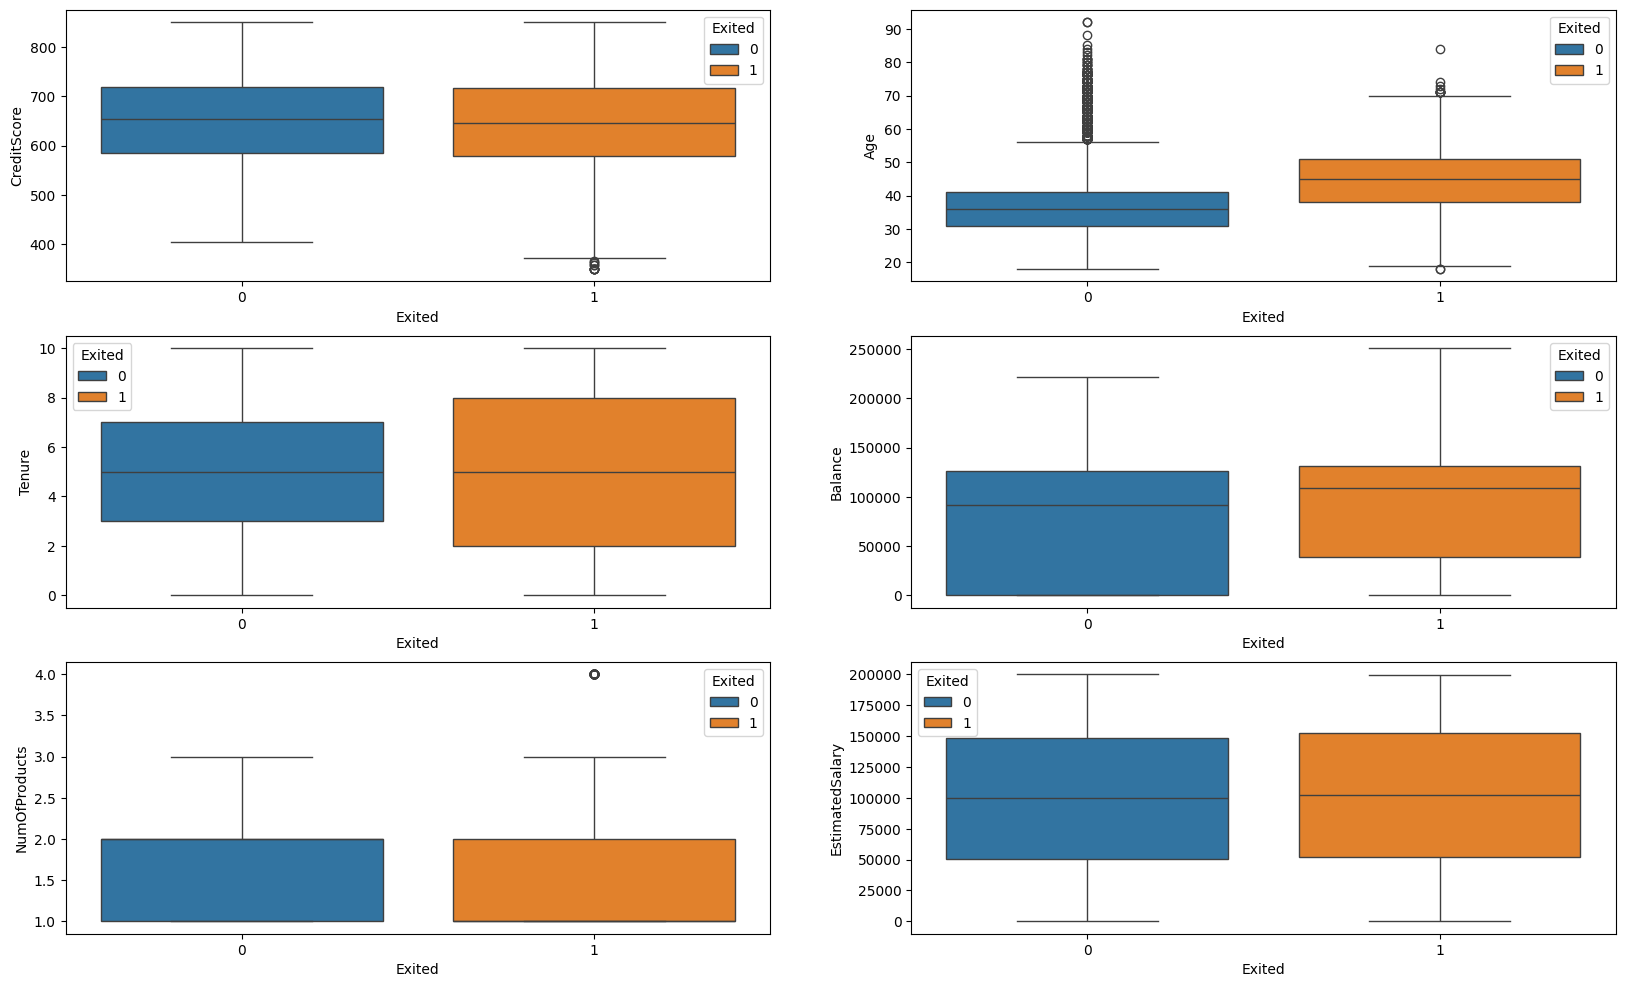

In [ ]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = churn, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = churn , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = churn, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = churn, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = churn, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = churn, ax=axarr[2][1])

how to read: People who churn whose mean age is 45 and people who don't churn whose mean age is 35.

In [ ]:
# Split Train, test data
churn_train = churn.sample(frac=0.8,random_state=200)
churn_test = churn.drop(churn_train.index)
print(len(churn_train))
print(len(churn_test))

8000
2000


(-1.0, 5.0)

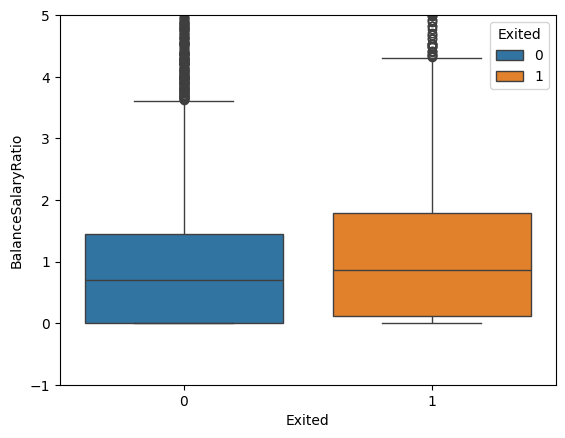

In [ ]:
churn_train['BalanceSalaryRatio'] = churn_train.Balance/churn_train.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = churn_train)
plt.ylim(-1, 5)

Created another feature : Balance(amount of money that each customer has in their account)and  salary ratio - to see what is the % of churners based on ammount of money they have in the account and ammount of salary they are getting.

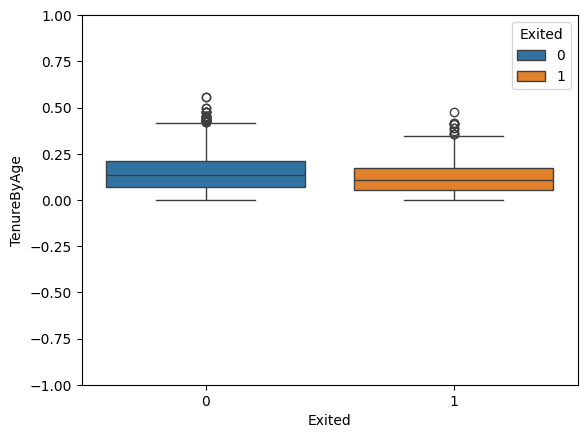

In [ ]:
#created another variable tenure of relationship with bank v/s person's age
churn_train['TenureByAge'] = churn_train.Tenure/(churn_train.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = churn_train)
plt.ylim(-1, 1)
plt.show()

In [ ]:
churn_train['CreditScoreGivenAge'] = churn_train.CreditScore/(churn_train.Age)

In [ ]:
# Resulting Data Frame
churn_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
8159,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0,0.000000,0.240000,18.440000
6332,619,France,Female,35,4,90413.12,1,1,1,20555.21,0,4.398550,0.114286,17.685714
8895,699,France,Female,40,8,122038.34,1,1,0,102085.35,0,1.195454,0.200000,17.475000
5351,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0,1.117305,0.048780,13.609756
4314,638,France,Male,34,5,133501.36,1,0,1,155643.04,0,0.857741,0.147059,18.764706


In [ ]:
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
churn_train = churn_train[['Exited'] + continuous_vars + cat_vars]
churn_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,0,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,0,1,France,Male


In [ ]:
# For the one hot variables, we change 0 to -1 so that the models can capture a negative relation where the attribute in inapplicable instead of 0
churn_train.loc[churn_train.HasCrCard == 0, 'HasCrCard'] = -1
churn_train.loc[churn_train.IsActiveMember == 0, 'IsActiveMember'] = -1
churn_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,France,Male


In [ ]:
# One hot encode the categorical variables
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (churn_train[i].dtype == str or churn_train[i].dtype == object):
        for j in churn_train[i].unique():
            churn_train[i+'_'+j] = np.where(churn_train[i] == j,1,-1)
        remove.append(i)
churn_train = churn_train.drop(remove, axis=1)
churn_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,1,-1,-1,1,-1
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,-1,1,-1,1,-1
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,-1,1,-1,1,-1
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,-1,-1,1,-1,1
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,-1,1,-1,-1,1


In [ ]:
# minMax scaling the continuous variables
minVec = churn_train[continuous_vars].min().copy()
maxVec = churn_train[continuous_vars].max().copy()
churn_train[continuous_vars] = (churn_train[continuous_vars]-minVec)/(maxVec-minVec)
churn_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,0.222,0.094595,0.6,0.000000,0.333333,0.076118,0.000000,0.432000,0.323157,1,1,1,-1,-1,1,-1
6332,0,0.538,0.229730,0.4,0.360358,0.000000,0.102376,0.003317,0.205714,0.305211,1,1,-1,1,-1,1,-1
8895,0,0.698,0.297297,0.8,0.486406,0.000000,0.510225,0.000901,0.360000,0.300198,1,-1,-1,1,-1,1,-1
5351,0,0.416,0.310811,0.2,0.495130,0.000000,0.555744,0.000843,0.087805,0.208238,1,1,-1,-1,1,-1,1
4314,0,0.576,0.216216,0.5,0.532094,0.000000,0.778145,0.000647,0.264706,0.330882,-1,1,-1,1,-1,-1,1


In [ ]:
# data prep pipeline for test data
def DfPrepPipeline(churn_predict,churn_train_Cols,minVec,maxVec):
    # Add new features
    churn_predict['BalanceSalaryRatio'] = churn_predict.Balance/churn_predict.EstimatedSalary
    churn_predict['TenureByAge'] = churn_predict.Tenure/(churn_predict.Age - 18)
    churn_predict['CreditScoreGivenAge'] = churn_predict.CreditScore/(churn_predict.Age - 18)
    # Reorder the columns
    continuous_vars = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
    cat_vars = ['HasCrCard','IsActiveMember',"Geography", "Gender"]
    churn_predict = churn_predict[['Exited'] + continuous_vars + cat_vars]
    # Change the 0 in categorical variables to -1
    churn_predict.loc[churn_predict.HasCrCard == 0, 'HasCrCard'] = -1
    churn_predict.loc[churn_predict.IsActiveMember == 0, 'IsActiveMember'] = -1
    # One hot encode the categorical variables
    lst = ["Geography", "Gender"]
    remove = list()
    for i in lst:
        for j in churn_predict[i].unique():
            churn_predict[i+'_'+j] = np.where(churn_predict[i] == j,1,-1)
        remove.append(i)
    churn_predict = churn_predict.drop(remove, axis=1)
    # Ensure that all one hot encoded variables that appear in the train data appear in the subsequent data
    L = list(set(churn_train_Cols) - set(churn_predict.columns))
    for l in L:
        churn_predict[str(l)] = -1
    # MinMax scaling coontinuous variables based on min and max from the train data
    churn_predict[continuous_vars] = (churn_predict[continuous_vars]-minVec)/(maxVec-minVec)
    # Ensure that The variables are ordered in the same way as was ordered in the train set
    churn_predict = churn_predict[churn_train_Cols]
    return churn_predict

In [ ]:
# Function to give best model score and parameters
def best_model(model):
    print(model.best_score_)
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method);
    fpr_churn, tpr_churn, _ = roc_curve(y_actual, method2);
    return (auc_score, fpr_churn, tpr_churn)

In [ ]:
# Fit primal logistic regression
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=0)
log_primal_Grid.fit(churn_train.loc[:, churn_train.columns != 'Exited'],churn_train.Exited)
best_model(log_primal_Grid)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.815625
{'C': 50, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 0.0001}
LogisticRegression(C=50, max_iter=250)


In [ ]:
# Fit logistic regression with degree 2 polynomial kernel
param_grid = {'C': [0.1,10,50,100], 'max_iter': [250,300,500], 'fit_intercept':[True],'intercept_scaling':[1],'penalty':['l2'],
              'tol':[0.0001,0.000001]}
poly2 = PolynomialFeatures(degree=2)
churn_train_pol2 = poly2.fit_transform(churn_train.loc[:, churn_train.columns != 'Exited'])
log_pol2_Grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5, refit=True, verbose=0)
log_pol2_Grid.fit(churn_train_pol2,churn_train.Exited)
best_model(log_pol2_Grid)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


0.8554999999999999
{'C': 100, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-06}
LogisticRegression(C=100, max_iter=250, solver='liblinear', tol=1e-06)


In [ ]:
# Fit SVM with RBF Kernel
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(churn_train.loc[:, churn_train.columns != 'Exited'],churn_train.Exited)
best_model(SVM_grid)

0.8518747609662071
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
SVC(C=100, gamma=0.1, probability=True)


In [ ]:
# Fit SVM with pol kernel
param_grid = {'C': [0.5,1,10,50,100], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['poly'],'degree':[2,3] }
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(churn_train.loc[:, churn_train.columns != 'Exited'],churn_train.Exited)
best_model(SVM_grid)

0.8544999485716948
{'C': 100, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly', 'probability': True}
SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)


In [ ]:

# Fit random forest classifier
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RanFor_grid.fit(churn_train.loc[:, churn_train.columns != 'Exited'],churn_train.Exited)
best_model(RanFor_grid)

0.8641249999999999
{'max_depth': 8, 'max_features': 9, 'min_samples_split': 3, 'n_estimators': 50}
RandomForestClassifier(max_depth=8, max_features=9, min_samples_split=3,
                       n_estimators=50)


In [ ]:
# Fit Extreme Gradient boosting classifier
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(churn_train.loc[:, churn_train.columns != 'Exited'],churn_train.Exited)
best_model(xgb_grid)

KeyboardInterrupt: 

In [ ]:
# Fit primal logistic regression
log_primal = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=250, multi_class='auto',n_jobs=None,
                                penalty='l2', random_state=None, solver='lbfgs',tol=1e-05, verbose=0, warm_start=False)
log_primal.fit(churn_train.loc[:, churn_train.columns != 'Exited'],churn_train.Exited)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=100, max_iter=250, multi_class='auto', tol=1e-05)

In [ ]:
# Fit logistic regression with pol 2 kernel
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(churn_train.loc[:, churn_train.columns != 'Exited'])
log_pol2 = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=300, multi_class='auto', n_jobs=None,
                              penalty='l2', random_state=None, solver='liblinear',tol=0.0001, verbose=0, warm_start=False)
log_pol2.fit(churn_train_pol2,churn_train.Exited)

In [ ]:
# Fit SVM with RBF Kernel
SVM_RBF = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True,
              random_state=None, shrinking=True,tol=0.001, verbose=False)
SVM_RBF.fit(churn_train.loc[:, churn_train.columns != 'Exited'],churn_train.Exited)


SVC(C=100, gamma=0.1, probability=True)

In [ ]:
# Fit SVM with Pol Kernel
SVM_POL = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',  max_iter=-1,
              probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)
SVM_POL.fit(churn_train.loc[:, churn_train.columns != 'Exited'],churn_train.Exited)


In [ ]:
# Fit Random Forest classifier
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, max_features=6, max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)
RF.fit(churn_train.loc[:, churn_train.columns != 'Exited'],churn_train.Exited)

In [ ]:
# Fit Extreme Gradient Boost Classifier
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0.01, learning_rate=0.1, max_delta_step=0,max_depth=7,
                    min_child_weight=5, missing=None, n_estimators=20,n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0,
                    reg_lambda=1, scale_pos_weight=1, seed=None, silent=True, subsample=1)
XGB.fit(churn_train.loc[:, churn_train.columns != 'Exited'],churn_train.Exited)

In [ ]:
print(classification_report(churn_train.Exited, log_primal.predict(churn_train.loc[:, churn_train.columns != 'Exited'])))

In [ ]:
print(classification_report(churn_train.Exited,  log_pol2.predict(churn_train_pol2)))

In [ ]:
print(classification_report(churn_train.Exited,  SVM_RBF.predict(churn_train.loc[:, churn_train.columns != 'Exited'])))

In [ ]:

print(classification_report(churn_train.Exited,  SVM_POL.predict(churn_train.loc[:, churn_train.columns != 'Exited'])))

In [ ]:

print(classification_report(churn_train.Exited,  SVM_POL.predict(churn_train.loc[:, churn_train.columns != 'Exited'])))

In [ ]:
y = churn_train.Exited
X = churn_train.loc[:, churn_train.columns != 'Exited']
X_pol2 = churn_train_pol2
auc_log_primal, fpr_log_primal, tpr_log_primal = get_auc_scores(y, log_primal.predict(X),log_primal.predict_proba(X)[:,1])
auc_log_pol2, fpr_log_pol2, tpr_log_pol2 = get_auc_scores(y, log_pol2.predict(X_pol2),log_pol2.predict_proba(X_pol2)[:,1])
auc_SVM_RBF, fpr_SVM_RBF, tpr_SVM_RBF = get_auc_scores(y, SVM_RBF.predict(X),SVM_RBF.predict_proba(X)[:,1])
auc_SVM_POL, fpr_SVM_POL, tpr_SVM_POL = get_auc_scores(y, SVM_POL.predict(X),SVM_POL.predict_proba(X)[:,1])
auc_RF, fpr_RF, tpr_RF = get_auc_scores(y, RF.predict(X),RF.predict_proba(X)[:,1])
#auc_XGB, fpr_XGB, tpr_XGB = get_auc_scores(y, XGB.predict(X),XGB.predict_proba(X)[:,1])

In [ ]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_log_primal, tpr_log_primal, label = 'log primal Score: ' + str(round(auc_log_primal, 5)))
plt.plot(fpr_log_pol2, tpr_log_pol2, label = 'log pol2 score: ' + str(round(auc_log_pol2, 5)))
plt.plot(fpr_SVM_RBF, tpr_SVM_RBF, label = 'SVM RBF Score: ' + str(round(auc_SVM_RBF, 5)))
plt.plot(fpr_SVM_POL, tpr_SVM_POL, label = 'SVM POL Score: ' + str(round(auc_SVM_POL, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'RF score: ' + str(round(auc_RF, 5)))
#plt.plot(fpr_XGB, tpr_XGB, label = 'XGB score: ' + str(round(auc_XGB, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()